<a href="https://colab.research.google.com/github/riyaroy2086/ML-Projects/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#To convert img data into numpy arrays
#visualizing the img done
import numpy as np 
#once we feed the numpy array to the plotlib we can see what the img is
import matplotlib.pyplot as plt
#Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import seaborn as sns 
#cv lib is a open computer vision lib -> img processing task
import cv2
#to display an img
from google.colab.patches import cv2_imshow
# PIL is PILLOW-> img processing task
from PIL import Image
import tensorflow as tf
# When we feed the neural network w/ the trained data , the neutal network learns from it
#Later when we test it w/ testing data , and if the seed (any value for say) is not provided
#it will generate slightly diff vaalue even if same input is given
#1 or 2 or any no. in the seed will produce identical results 
tf.random.set_seed(1)
#dl lib to create neural network
from tensorflow import keras
# importing the dataset
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Data Collection Part (MNIST data ) from keras dataset

It already pre processed the imgs


In [21]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
# we will get 4 arrays

In [22]:
# imgs have already been converted to numpt array
type(X_train) # n dimensional array

numpy.ndarray

In [23]:
#Shape of the numpy arrays
(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
#(no. of imgs, width,height,grayscale or rgb )

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [24]:
#printing a particular img
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [25]:
#printing the dimension
print(X_train[5].shape)

(28, 28)


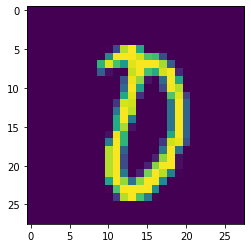


Y_train label contains 0 at the exact same index.


In [34]:
#displaying the img
plt.imshow(X_train[1600])
plt.show()

print("")
#printing the corresponding label for X_train +nt in tthe Y_train
print("Y_train label contains",Y_train[1600],"at the exact same index.")

Label uniqueness 

In [28]:
print(np.unique(Y_train)) #finding all the unque arrays in numpy array Y_train

[0 1 2 3 4 5 6 7 8 9]


In [35]:
print(np.unique(Y_test)) #finding all the unque arrays in numpy array Y_test

[0 1 2 3 4 5 6 7 8 9]


One Hot encoding (study this)

In [36]:
#GrayScaling the values fo the imgs in the range 0 to 1
X_train = X_train/255
X_test = X_test/255

In [37]:
#printing a particular img
print(X_train[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Processing section done

Creating the neural network

CNN(convolutional neural network) is mainly for img recognision and recurrent neural network is used for voice, audio etc

In [40]:
#Setting up the layers of the neural network
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     #Flatten flattens the 2D array into a single line
     keras.layers.Dense(50,activation='relu'), #Rectified Linear Unit
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')# output layer
     # there are only 10 digits as the labels
     #so this needs to be 10
     #relu activation functions no. can be diff

])

In [43]:
# Compilation of thr Neural Network
model.compile(optimizer = 'adam', #optimizer selectio depends on the accuracy lvl
              loss ='sparse_categorical_crossentropy',
              # simple digits
              metrics= ['accuracy'])

In [45]:
#Training the neural Network
model.fit(X_train,Y_train,epochs=10) #no. of the times neural network wo=ill go thru the data


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0339 - accuracy: 0.9889
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0312 - accuracy: 0.9899
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0297 - accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0170 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

Accuracy of traning data = 0.9945 or 99.45%

In [49]:
loss,accuracy = model.evaluate(X_test, Y_test)
print("The test data accuracy",accuracy,"or",accuracy*100,"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1161 - accuracy: 0.9753
The test data accuracy 0.9753000140190125 or 97.53000140190125 %


In [50]:
print(X_test.shape)

(10000, 28, 28)


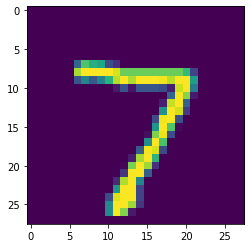


7


In [53]:
plt.imshow(X_test[0]) # the first data pnt in X_test
plt.show()

print("")
print(Y_test[0])

In [54]:
Y_prediction = model.predict(X_test) # predict labels for all the 10k imgs


313/313 [==============================] - 1s 2ms/step


In [56]:
print(Y_prediction.shape) #10 becoz there are 10 values in a single label printing probabilities as the neural network visita=s all the 10 labels

(10000, 10)


In [58]:
print(Y_prediction[0]) 

[7.5251386e-08 3.4151103e-03 4.6808827e-03 9.6085846e-01 4.9981468e-09
 3.1865185e-01 3.3643453e-16 9.9999964e-01 3.0897509e-03 6.3935524e-01]


model.predict() gives the prediction probability of each class for that data point -- VVIMP
